In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.datasets import load_digits

In [ ]:
###############################################################################
# preview pictures of digits
# just a helper function
#
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1 * n_col, 1.2 * n_row), dpi=50)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=1.2, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.binary)
        plt.title(titles[i], size=24)
        plt.xticks(())
        plt.yticks(())

In [ ]:
# load the MNIST digits from sklearn to explore what is inside

d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# observe the data

d['data'].shape
d['target']

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
###############################################################################
# read the data
digits = load_digits()
digits

# Copy data to separate matrices:
X = digits['data']
y = digits['target']
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

In [ ]:
# height and width of the data image
h = 8
w = 8

In [ ]:
X.shape

(1797, 64)

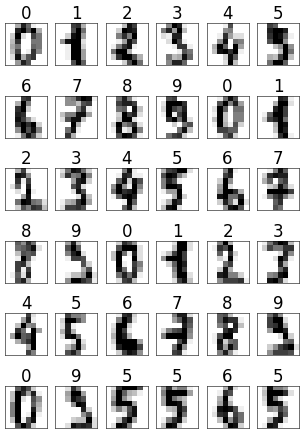

In [ ]:
# plot some digits using the helper function plot_gallery defined above

plot_gallery(X, y, h, w, n_row=6, n_col=6)

In [ ]:
###############################################################################
# Print data about the set of digits
print(f"dataset contains {X.shape[0]} images each with {X.shape[1]} pixels ")

dataset contains 1797 images each with 64 pixels 


In [ ]:
###############################################################################
# Divide the dataset into training and test data using the function described here in a 5:1 ratio:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html
#
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
###############################################################################
# Build a classier, train it iwth the .fit method and predict some results
#
# DEPTH = 10
# MAX_FEAT = 100
clf = DecisionTreeClassifier(max_depth=4)     # DecisionTreeClassifier classified instance
clf = clf.fit(X_train,y_train)                # train the model on the training data
y_pred = clf.predict(X_test)                  # predict for test data

In [ ]:
# calculate global accuracy in percents (you can use the condition: y_pred == y_test)

np.sum(y_pred == y_test) / y_pred.shape[0] * 100

56.666666666666664

(array([ 11,  45,  56,  59,  62,  64,  78,  82,  84,  91,  94,  96,  98,
        107, 115, 119, 122, 125, 128, 146, 148, 160, 168, 177, 178, 190,
        193, 194, 197, 199, 213, 217, 223, 224, 229, 232, 239, 265, 276,
        282, 283, 292, 293, 298, 310, 320, 328, 329, 331, 344, 349, 358,
        370, 379, 380, 383, 386, 393, 394, 396, 402, 409, 410, 416, 420,
        424, 427, 431, 436, 440]),)

In [ ]:
X_test.shape

(450, 64)

In [ ]:
wrong_indexes = np.where(y_pred != y_test)[0]
wrong_indexes

array([ 11,  45,  56,  59,  62,  64,  78,  82,  84,  91,  94,  96,  98,
       107, 115, 119, 122, 125, 128, 146, 148, 160, 168, 177, 178, 190,
       193, 194, 197, 199, 213, 217, 223, 224, 229, 232, 239, 265, 276,
       282, 283, 292, 293, 298, 310, 320, 328, 329, 331, 344, 349, 358,
       370, 379, 380, 383, 386, 393, 394, 396, 402, 409, 410, 416, 420,
       424, 427, 431, 436, 440])

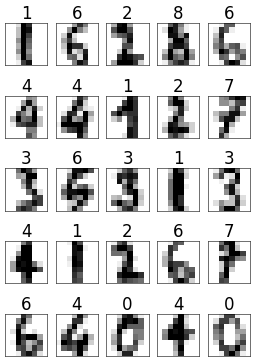

In [ ]:
# See some classifications, try to implement only with wrong answers? Can you figure out how to do it?
# Show a few classification results using auxiliary function
# plot_gallery(X_test[ wrong_indexes, :], y_pred[ wrong_indexes ], 8, 8, n_row=5, n_col=5)

plot_gallery(X_test, y_pred, 8, 8, n_row=5, n_col=5)

In [ ]:
# generate accuracy metrics

print(f"result F1: {f1_score(y_pred, y_test, average='weighted')}") # fill in missing
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("classification report:")
print(classification_report(y_test, y_pred))

result F1: 0.842077801031929
confusion matrix:
[[45  0  1  1  1  0  0  0  1  0]
 [ 0 37  2  2  1  0  0  1  5  0]
 [ 0  1 33  0  0  0  1  0  1  0]
 [ 0  1  0 33  0  0  0  1  6  0]
 [ 1  1  1  0 43  2  0  1  0  0]
 [ 0  2  0  3  1 42  1  0  0  2]
 [ 0  0  0  0  0  0 41  0  1  0]
 [ 0  0  3  1  1  1  0 46  0  3]
 [ 0  0  2  3  0  0  0  0 26  1]
 [ 0  1  0  3  1  1  0  3  4 34]]
classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        49
           1       0.86      0.77      0.81        48
           2       0.79      0.92      0.85        36
           3       0.72      0.80      0.76        41
           4       0.90      0.88      0.89        49
           5       0.91      0.82      0.87        51
           6       0.95      0.98      0.96        42
           7       0.88      0.84      0.86        55
           8       0.59      0.81      0.68        32
           9       0.85      0.72      0.78        47

   

Tasks:

Based on the code above, check:

* dependence of the F1 measure on the parameter:
   * tree depth
   * the number of features used in the classification
* For optimal DEPTH and MAX_FEAT parameters, examine the accuracy dependence on the number of examples in the training set

In [ ]:
clf.get_depth()

4

Text(0.5, 1.0, 'f1 of tree depth')

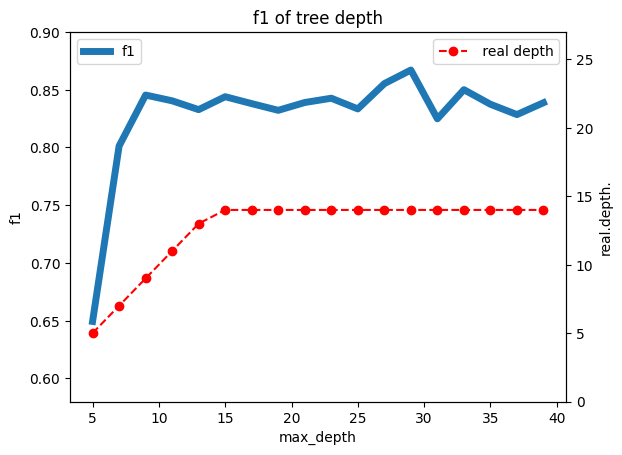

In [ ]:
f1_depth = []
real_depth = []
n = 40
max_depths = range(5,n, 2)

for md in max_depths:
    clf = DecisionTreeClassifier(max_depth=md)     # DecisionTreeClassifier classified instance
    clf = clf.fit(X_train,y_train)                 # train the model on the training data
    y_pred = clf.predict(X_test)                   # predict for test data
    real_depth.append( clf.get_depth())
    f1_depth.append( f1_score( y_test, y_pred , average='weighted') )

plt.plot(max_depths, f1_depth, label='f1', lw=5)
plt.ylabel("f1")
plt.ylim(0.58, 0.9)
plt.legend(loc=2)
plt.xlabel("max_depth")
plt.twinx()
plt.ylabel("real.depth.")
plt.ylim(0, 27)
plt.plot(max_depths, real_depth, "--or", label=' real depth')
plt.legend(loc=1)
plt.title("f1 of tree depth")


Text(0.5, 1.0, 'Number of features')

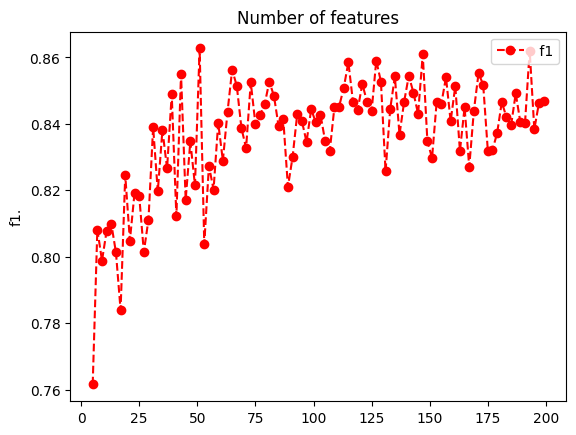

In [ ]:
f1_features = []
n = 200
features = range(5,n, 2)

for f in features:
    clf = DecisionTreeClassifier(max_depth=20, max_features=f)     # DecisionTreeClassifier classified instance
    clf = clf.fit(X_train,y_train)                 # train the model on the training data
    y_pred = clf.predict(X_test)                   # predict for test data
    f1_features.append( f1_score( y_test, y_pred , average='weighted') )

plt.ylabel("f1.")
plt.plot(features, f1_features, "--or", label=' f1')
plt.legend(loc=1)
plt.title("Number of features")
